<a href="https://colab.research.google.com/github/beatricexc/Artificial-Intelligence-Machine-Learning/blob/main/Clustering_with_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm    Species
0      1            5.1           3.5            1.4           0.2     setosa
1      2            4.9           3.0            1.4           0.2     setosa
2      3            4.7           3.2            1.3           0.2     setosa
3      4            4.6           3.1            1.5           0.2     setosa
4      5            5.0           3.6            1.4           0.2     setosa
..   ...            ...           ...            ...           ...        ...
145  146            6.7           3.0            5.2           2.3  virginica
146  147            6.3           2.5            5.0           1.9  virginica
147  148            6.5           3.0            5.2           2.0  virginica
148  149            6.2           3.4            5.4           2.3  virginica
149  150            5.9           3.0            5.1           1.8  virginica

[150 rows x 6 columns]


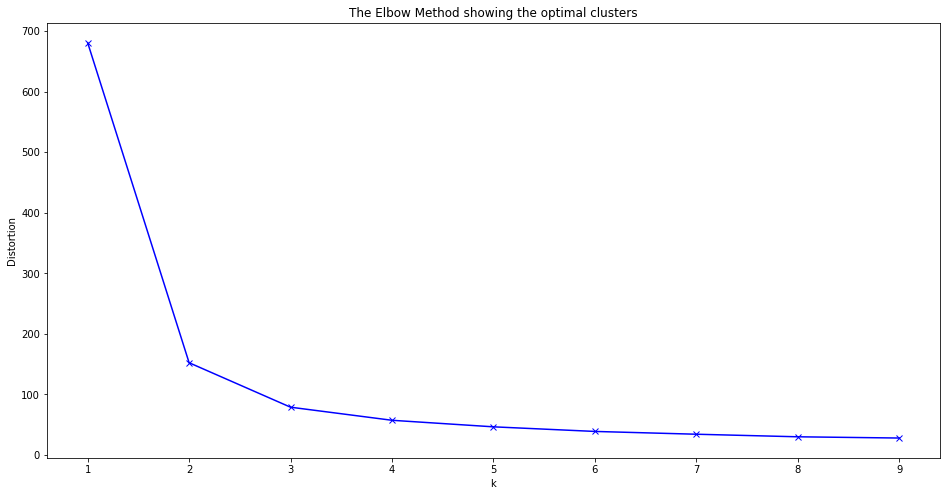

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 3 4 1 1 4 2 4 1 4 1
 1 1 3 1 1 1 4 4 3 1 3 4 3 1 4 3 3 1 4 4 4 1 3 3 4 1 1 3 1 1 1 3 1 1 1 3 1
 1 3]


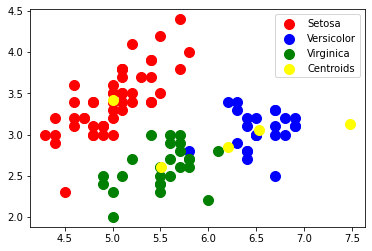

In [ ]:
#Load Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

#Step 2. Import Iris dataset and study its properties. 
iris = pd.read_csv('/content/Iris (1).csv')
iris.head(10)
#Step 3. Remove the "iris-" from the species 
iris['Species'] = iris.Species.str.replace('Iris-', '')
print(iris)

#Step 4. Prepare data for clustering 
#To do the clustering, we only need four features (sepal length, sepal witdh, petal length, and petal width from the table)
#We can subtract these columns into a new variable called 'x'
x = iris.iloc[:,[1,2,3,4]]
x = np.array(x)

#Step 5. Find the optimal nuber of clusters. Before we implement the k-means and assign the centers of our data, we can also make a quick analysis to find the optimal
#number(Centers) using the Elbow Method

#Collecting the distorsions into list
distortions =[]
K = range(1, 10)
for k in K: 
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(x)
  distortions.append(kmeanModel.inertia_)
#Plotting distortions

plt.figure(figsize=(16,8))
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()
#The 'elbow' is the number 3 which is the optimal clusters(center) in this case

#Step 6. Implement the K-Means
kmeans_model=k=KMeans(n_clusters=5,n_jobs=5,random_state = 32932) #define the model
kmeans_predict=kmeans_model.fit_predict(x) #fit into our dataset fit
print(kmeans_predict)

iris['Cluster'] = kmeans_predict # merging the result of the clusters with our original data table
iris.head(30)

#Step 7. Clustering output visualisation

plt.scatter(x[kmeans_predict == 0,0], x[kmeans_predict ==0,1], s= 100, c='red', label='Setosa') #Visualising the clusters 
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1,1], s =100, c='blue', label='Versicolor')#Visualising the clusters 
plt.scatter(x[kmeans_predict == 2,0], x[kmeans_predict == 2, 1], s = 100, c='green', label='Virginica')#Visualising the clusters 

plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='yellow', label = 'Centroids') #plottin the centroids of the cluster
plt.legend()

**Clustering** in the most common form of unservised learning, where the data is unlabled, involves segregating data based on the similarity between data instances. 

K-means is a popular technique for clustering. It involves an iterative process to find cluster centers called centroids and assigning data points to one of the centroids. 

The steps of K-means clustering are comprised of 

1. Identify number of cluster K
2. Identify centroid of each cluster
3. Determine distance of objects to centroid
4. Grouping objects based on minimum distance. **bold text**

**Resources**:
1. https://developers.google.com/machine-learning/clustering/overview
2. https://medium.com/analytics-vidhya/k-means-clustering-with-python-beginner-tutorial45a44c34e7f.
3. Sisodia, D., Singh, L., Sisodia, S., & Saxena, K. (2012). Clustering techniques: a brief survey of
different clustering algorithms. International Journal of Latest Trends in Engineering and
Technology (IJLTET), 1(3), 82-87